<a href="https://colab.research.google.com/github/Jbaruz/supervised_learning/blob/main/linear_regression_honey_OOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving honeyproduction.csv to honeyproduction.csv
  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  
year
1998    5.105093e+06
1999    4.706674e+06
2000    5.106000e+06
2001    4.221545e+06
2002    3.892386e+06
2003    4.122091e+06
2004    4.456805e+06
2005    4.243146e+06
2006    3.761902e+06
2007    3.600512e+06
2008    3.974927e+06
2009    3.626700e+06
2010    4.382350e+06
2011    3.680025e+06
2012    3.522675e+06
Name: totalprod, dtype: float64
Slope of the line: [-88303.18915238]
Intercep

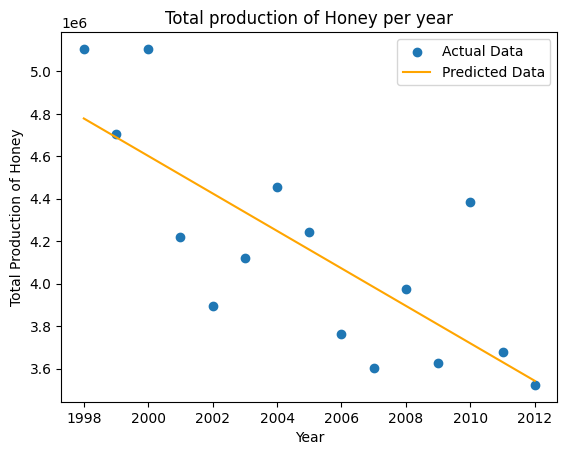

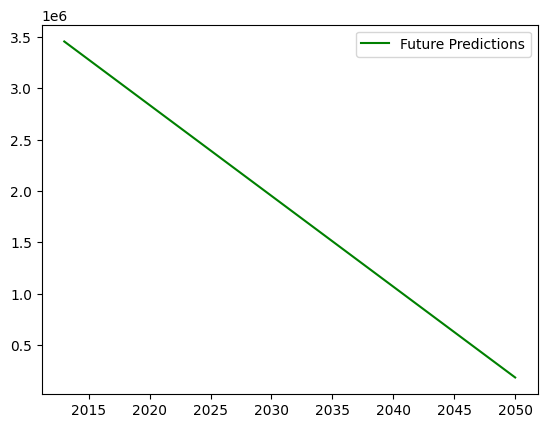

Predicted honey production for the year 2050: 186545.34


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from google.colab import files

class HoneyProductionAnalysis:
    def __init__(self):
        """Initialize the class without needing a URL."""
        self.model = LinearRegression()

    def upload_data(self):
        """Upload data file and load into DataFrame."""
        uploaded = files.upload()
        filename = next(iter(uploaded))
        self.df = pd.read_csv(filename)
        print(self.df.head())

    def preprocess_data(self):
        """Process data to get average production per year and prepare for regression."""
        self.prod_per_year = self.df.groupby('year')['totalprod'].mean()
        print(self.prod_per_year)
        self.X = self.prod_per_year.index.values.reshape(-1,1)  # Years
        self.y = self.prod_per_year.values  # Production values

    def fit_model(self):
        """Fit the linear regression model to the data."""
        self.model.fit(self.X, self.y)
        print(f"Slope of the line: {self.model.coef_}")
        print(f"Intercept of the line: {self.model.intercept_}")

    def predict(self, start_year, end_year):
        """Predict future production given a range of years."""
        self.future_years = np.array(range(start_year, end_year)).reshape(-1, 1)
        self.future_predict = self.model.predict(self.future_years)

    def plot_data(self):
        """Visualize the actual data, the model, and future predictions."""
        plt.scatter(self.X, self.y, label='Actual Data')
        plt.plot(self.X, self.model.predict(self.X), label='Predicted Data', color='orange')
        plt.xlabel('Year')
        plt.ylabel('Total Production of Honey')
        plt.title('Total production of Honey per year')
        plt.legend()
        plt.show()

        plt.plot(self.future_years, self.future_predict, color='green', label='Future Predictions')
        plt.legend()
        plt.show()

# Usage
analysis = HoneyProductionAnalysis()
analysis.upload_data()
analysis.preprocess_data()
analysis.fit_model()
analysis.predict(2013, 2051)
analysis.plot_data()
print(f"Predicted honey production for the year 2050: {analysis.future_predict[-1]:.2f}")
